
# 회귀 분석 (Regression)

회귀 분석은 입력 변수(독립 변수)를 사용하여 출력 변수(종속 변수)를 예측하는 통계적 기법입니다.  
데이터의 패턴과 관계를 이해하고 미래 값을 예측하는 데 사용됩니다.

---

## 1. 회귀 분석의 유래
**'회귀'라는 용어의 기원:**  
영국 과학자 프랜시스 갈톤(Francis Galton)이 부모와 자녀의 키 데이터를 통해 발견한 "평균으로의 회귀" 개념에서 유래되었습니다.  
갈톤은 부모의 극단적인 특성이 자녀 세대에서 평균적으로 회귀하는 경향이 있음을 논문에서 기술했습니다.

### 주요 내용
- 연구 데이터: 205쌍의 부모와 자녀 키 데이터.
- '평균 부모 키'와 '자녀 키의 중간값'의 상관관계를 분석.
- 자녀의 키는 부모보다 편차가 작아 평균으로 회귀.

결론: 자식 세대는 부모 세대의 극단적인 특성을 평균적으로 완화하여 이어받는 경향이 있음.


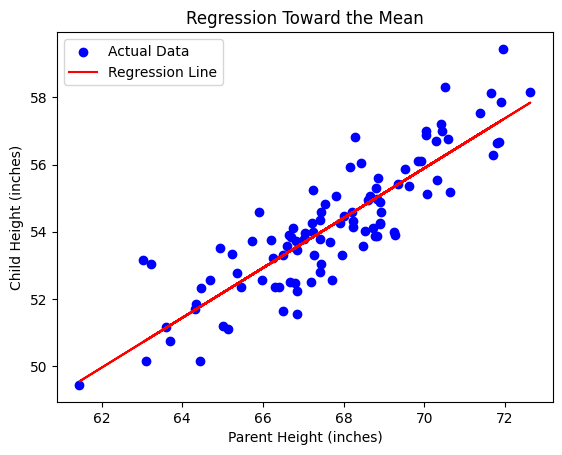

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 부모와 자녀의 키 데이터를 생성
np.random.seed(42)
parent_heights = np.random.normal(68, 2.5, 100)  # 부모 평균 키: 68인치
child_heights = parent_heights * 0.8 + np.random.normal(0, 1, 100)  # 자녀 키

# 회귀 모델 학습
parent_heights = parent_heights.reshape(-1, 1)  # 독립 변수 형식 변환
model = LinearRegression()
model.fit(parent_heights, child_heights)

# 예측 및 시각화
predicted_heights = model.predict(parent_heights)
plt.scatter(parent_heights, child_heights, color='blue', label='Actual Data')
plt.plot(parent_heights, predicted_heights, color='red', label='Regression Line')
plt.xlabel("Parent Height (inches)")
plt.ylabel("Child Height (inches)")
plt.title("Regression Toward the Mean")
plt.legend()
plt.show()



---

## 2. 회귀 분석의 기본 개념
### 정의
- 회귀 분석은 **독립 변수(입력 변수)**로부터 **종속 변수(출력 변수)**를 추정하는 기법입니다.
- 독립 변수와 종속 변수 간의 상관관계를 수학적 모델로 나타냅니다.

### 주요 용어
1. **입력 변수 (독립 변수)**  
   - 예측 변수, 설명 변수, 공변량 등으로 불림.  
   - 예: 아파트 방 개수, 방 크기, 학군 등.
2. **출력 변수 (종속 변수)**  
   - 반응 변수, 목표 변수, 타겟 등으로 불림.  
   - 예: 아파트 가격.

---

## 3. 선형 회귀 (Linear Regression)
선형 회귀는 독립 변수와 종속 변수 간의 관계를 선형 방정식으로 나타냅니다.

### 종류
1. **단순 선형 회귀**  
   - 독립 변수와 종속 변수가 각각 하나인 경우.  
   - 예: 주택 크기와 가격의 관계.

2. **다중 선형 회귀**  
   - 여러 독립 변수가 종속 변수에 영향을 미치는 경우.  
   - 예: 방 개수, 방 크기, 학군과 아파트 가격.

3. **다변수 선형 회귀**  
   - 다수의 독립 변수와 다수의 종속 변수가 포함된 경우.

### 수학적 표현
- 모델: \( y = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b \)
  - \( w \): 회귀 계수 (기울기)
  - \( b \): 절편


Mean Squared Error: 4061.83
R-squared: 0.23


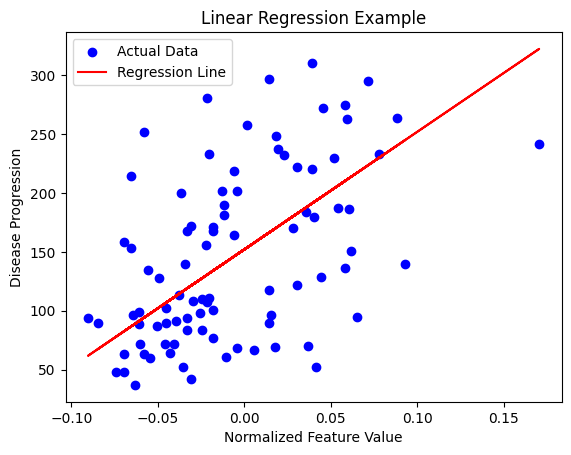

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터셋 로드
data = load_diabetes()
X, y = data.data[:, 2].reshape(-1, 1), data.target  # 하나의 피처 사용

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 및 시각화
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("Normalized Feature Value")
plt.ylabel("Disease Progression")
plt.title("Linear Regression Example")
plt.legend()
plt.show()


---

## 4. 다항 회귀 (Polynomial Regression)
다항 회귀는 데이터를 다항식으로 모델링하여 선형 회귀로 표현할 수 없는 복잡한 관계를 설명합니다.

### 특징
- 2차 이상의 다항식으로 데이터를 모델링.
- 선형 회귀와 동일한 방식으로 회귀 계수를 추정.

### 예시
- \( y = w_1x^2 + w_2x + b \): 2차 다항식
- \( y = w_1x^3 + w_2x^2 + w_3x + b \): 3차 다항식


Polynomial Regression - Mean Squared Error: 4085.03
Polynomial Regression - R-squared: 0.23


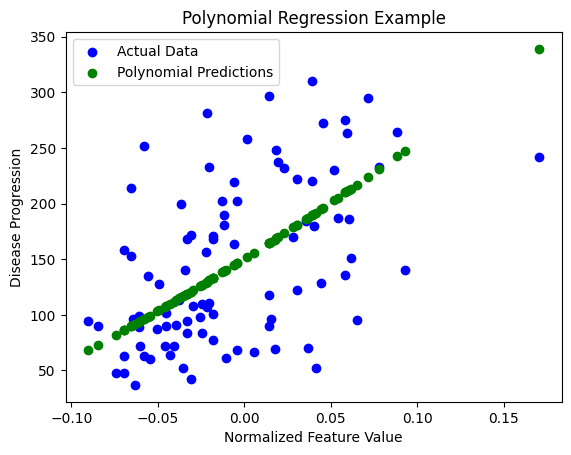

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 다항 회귀 모델 생성
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# 예측
y_pred_poly = poly_model.predict(X_test)

# 평가 및 시각화
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression - Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Regression - R-squared: {r2_poly:.2f}")

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_poly, color='green', label='Polynomial Predictions')
plt.xlabel("Normalized Feature Value")
plt.ylabel("Disease Progression")
plt.title("Polynomial Regression Example")
plt.legend()
plt.show()


---

## 5. 릿지 회귀 (Ridge Regression)
릿지 회귀는 과적합 문제를 해결하기 위해 **L2 정규화**를 적용한 회귀 분석 방법입니다.

### 주요 특징
- 회귀 계수의 크기를 줄여 모델의 복잡도를 낮춤.
- 손실 함수에 제약 조건을 추가하여 불필요한 가중치를 감소.

### 수학적 표현
- 손실 함수: \( L = ||y - Xw||^2 + \lambda||w||^2 \)
  - \( \lambda \): 정규화 강도 (하이퍼파라미터)


Ridge Regression - Mean Squared Error: 4196.65
Ridge Regression - R-squared: 0.21


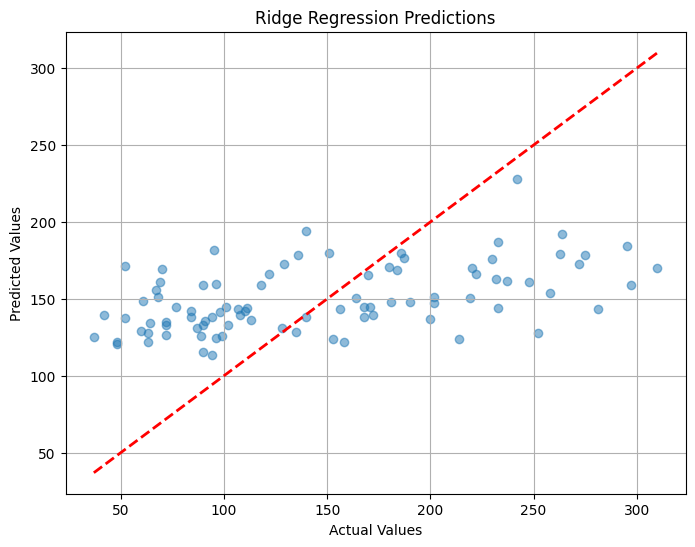

In [6]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 릿지 회귀 모델 생성 및 학습
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 예측
y_pred_ridge = ridge_model.predict(X_test)

# 평가
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge:.2f}")
print(f"Ridge Regression - R-squared: {r2_ridge:.2f}")

# 시각화 코드 추가
plt.figure(figsize=(8, 6))  # 추가된 부분
plt.scatter(y_test, y_pred_ridge, alpha=0.5)  # 실제 값과 예측 값의 산점도
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # y=x 선
plt.title('Ridge Regression Predictions')  # 추가된 부분
plt.xlabel('Actual Values')  # 추가된 부분
plt.ylabel('Predicted Values')  # 추가된 부분
plt.grid()  # 추가된 부분
plt.show()  # 추가된 부분


---

## 6. 라쏘 회귀 (Lasso Regression)
라쏘 회귀는 **L1 정규화**를 사용하여 일부 회귀 계수를 0으로 만듭니다.  
이를 통해 변수 선택 기능을 제공합니다.

### 주요 특징
- 불필요한 변수 제거로 해석 가능성 향상.
- 복잡한 데이터에서도 효과적.

### 수학적 표현
- 손실 함수: \( L = ||y - Xw||^2 + \lambda||w||_1 \)


Lasso Regression - Mean Squared Error: 4017.03
Lasso Regression - R-squared: 0.24


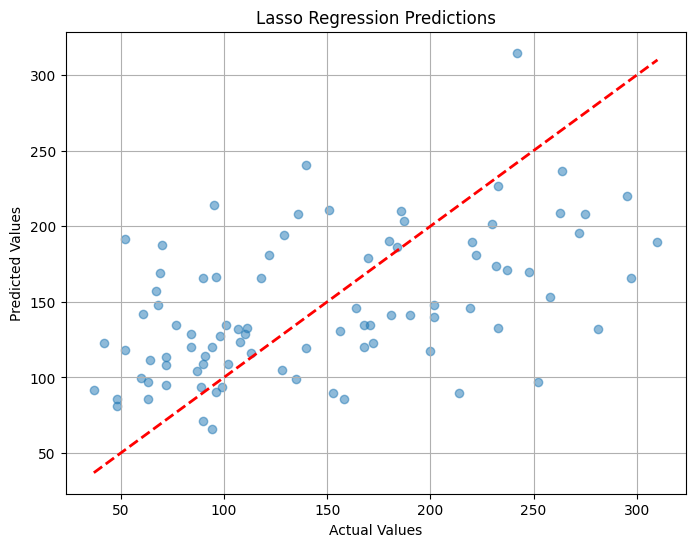

In [7]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 라쏘 회귀 모델 생성 및 학습
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# 예측
y_pred_lasso = lasso_model.predict(X_test)

# 평가
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso:.2f}")
print(f"Lasso Regression - R-squared: {r2_lasso:.2f}")

# 시각화 코드 추가
plt.figure(figsize=(8, 6))  # 추가된 부분
plt.scatter(y_test, y_pred_lasso, alpha=0.5)  # 실제 값과 예측 값의 산점도
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # y=x 선
plt.title('Lasso Regression Predictions')  # 추가된 부분
plt.xlabel('Actual Values')  # 추가된 부분
plt.ylabel('Predicted Values')  # 추가된 부분
plt.grid()  # 추가된 부분
plt.show()  # 추가된 부분